In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기

data = pd.read_csv("/Users/simgyuseong/Documents/문화데이터공모전/행사_승하차_데이터3.csv")
data.head(5)

,행사명,행사날짜,시작 시간,끝나는 시간,호선,가까운 지하철역,인원,승/하차 인원,06시이전,06-07시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시 이후
0,아이유 콘서트,2022.9.17,19:00,21:30,2호선,종합운동장역,NaN,승차,48,115,...,2180,1936,1597,1306,1635,7835,1391,18898,1425,5.0
1,아이유 콘서트,2022.9.17,19:00,21:30,2호선,종합운동장역,NaN,하차,30,458,...,7149,11838,11693,5798,543,528,566,1140,275,26.0
2,아이유 콘서트,2022.9.18,19:00,21:30,2호선,종합운동장역,NaN,승차,65,90,...,2196,2210,6549,1564,624,733,829,20302,1215,5.0
3,아이유 콘서트,2022.9.18,19:00,21:30,2호선,종합운동장역,NaN,하차,28,331,...,5147,5734,10420,6812,472,430,445,702,207,8.0
4,싸이 흠뻑쇼,2022.7.15,18:42,22:40,2호선,종합운동장역,NaN,승차,55,218,...,1077,939,961,1039,649,820,1745,12561,5655,155.0


In [3]:
data_station = data.iloc[:, 5]
data_time = data.iloc[:, 8:27]
data_ride = data.iloc[0::2]
data_ride.head()

,행사명,행사날짜,시작 시간,끝나는 시간,호선,가까운 지하철역,인원,승/하차 인원,06시이전,06-07시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시 이후
0,아이유 콘서트,2022.9.17,19:00,21:30,2호선,종합운동장역,NaN,승차,48,115,...,2180,1936,1597,1306,1635,7835,1391,18898,1425,5.0
2,아이유 콘서트,2022.9.18,19:00,21:30,2호선,종합운동장역,NaN,승차,65,90,...,2196,2210,6549,1564,624,733,829,20302,1215,5.0
4,싸이 흠뻑쇼,2022.7.15,18:42,22:40,2호선,종합운동장역,NaN,승차,55,218,...,1077,939,961,1039,649,820,1745,12561,5655,155.0
6,싸이 흠뻑쇼,2022.7.16,18:42,22:40,2호선,종합운동장역,NaN,승차,71,132,...,691,827,1009,421,585,768,3507,18787,9476,5.0
8,싸이 흠뻑쇼,2022.7.17,18:42,22:40,2호선,종합운동장역,NaN,승차,55,75,...,739,657,467,409,490,2168,1129,7502,7276,2.0


In [4]:
plt.rcParams['font.family'] = 'AppleGothic'

In [5]:
data.columns

Index(['행사명', '행사날짜', '시작 시간', '끝나는 시간', '호선', '가까운 지하철역', '인원', '승/하차 인원',
       '06시이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대',
       '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대',
       '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대',
       '23-24시간대', '24시 이후'],
      dtype='object')

(30, 28)


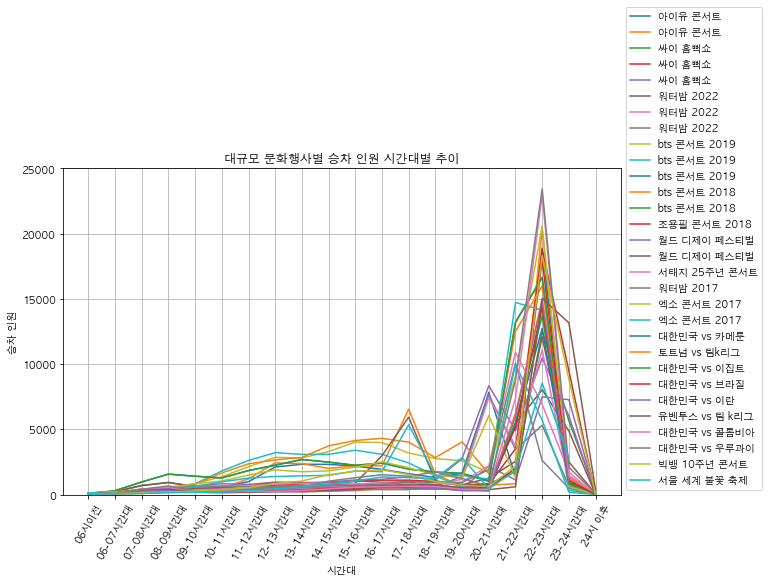

In [6]:
df = pd.DataFrame(data_ride)

print(df.shape)
# 데이터프레임에서 '06시이전'부터 '24시 이후'까지의 열 선택
time_columns = df.columns[df.columns.get_loc('06시이전'):df.columns.get_loc('24시 이후')+1]


# 꺾은선 그래프 생성
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(time_columns, row[time_columns], label=row['행사명'])

plt.xlabel('시간대')
plt.ylabel('승차 인원')
plt.ylim(0,25000)
plt.title('대규모 문화행사별 승차 인원 시간대별 추이')
plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.0))
plt.xticks(rotation = 60)
plt.grid(True)
plt.show()

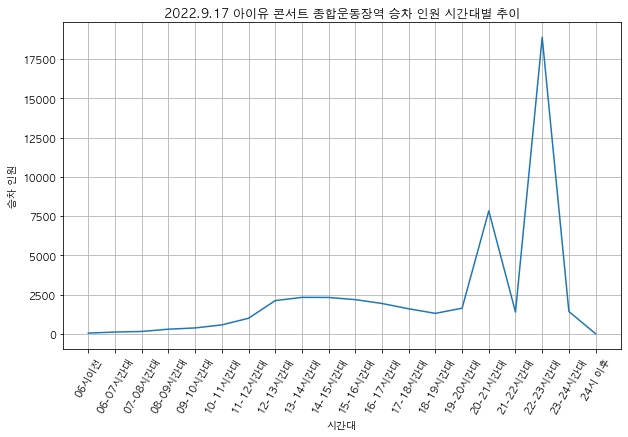

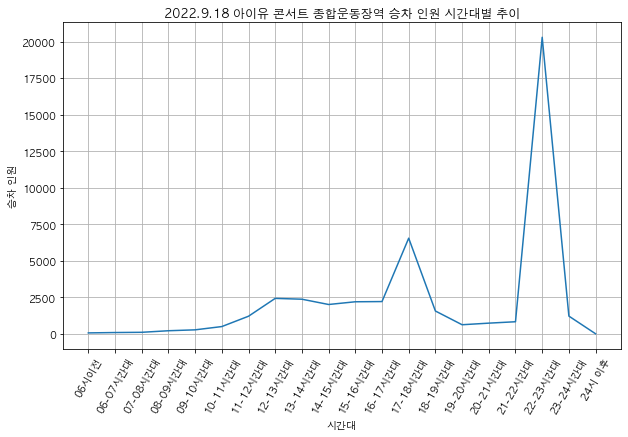

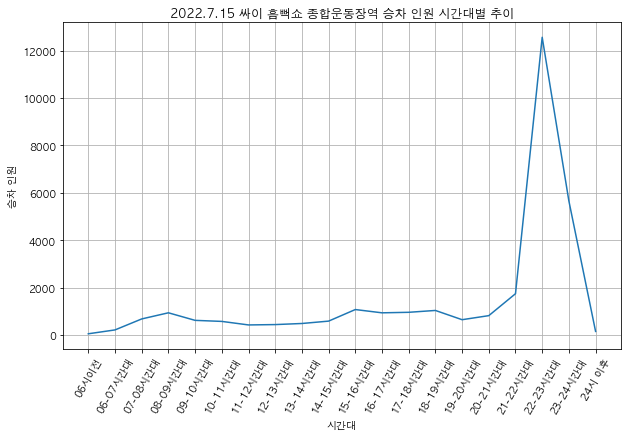

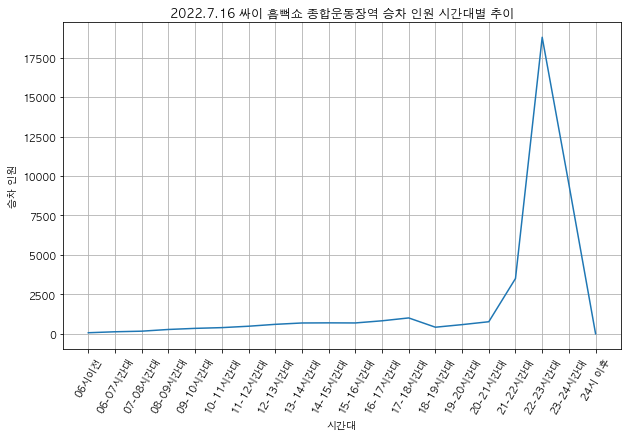

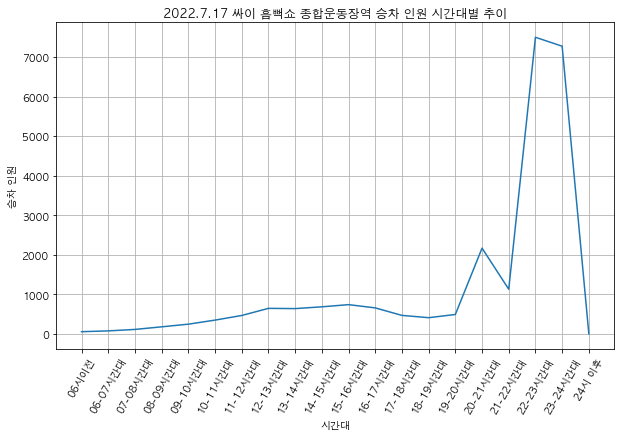

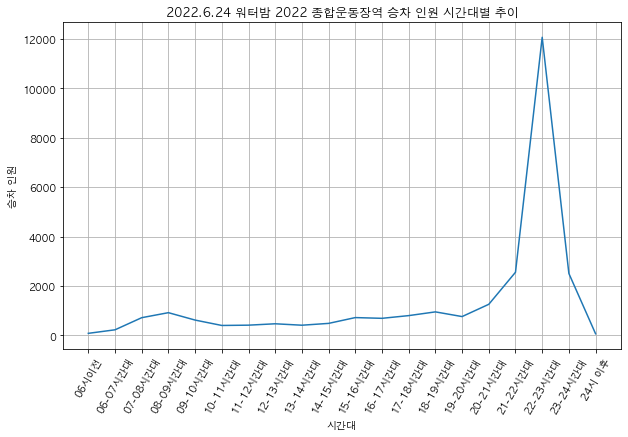

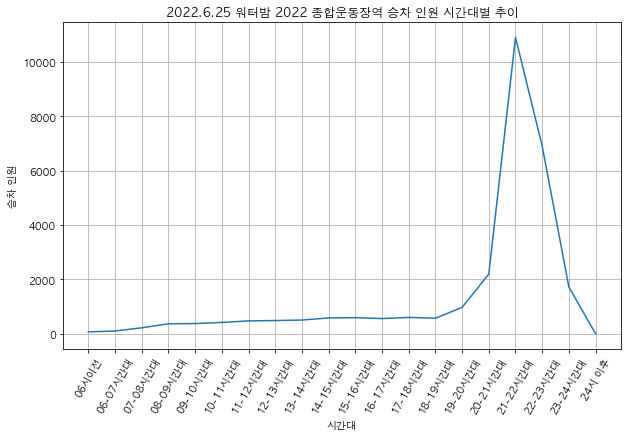

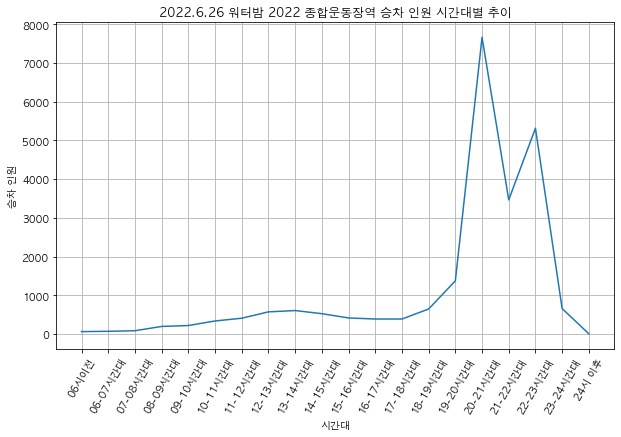

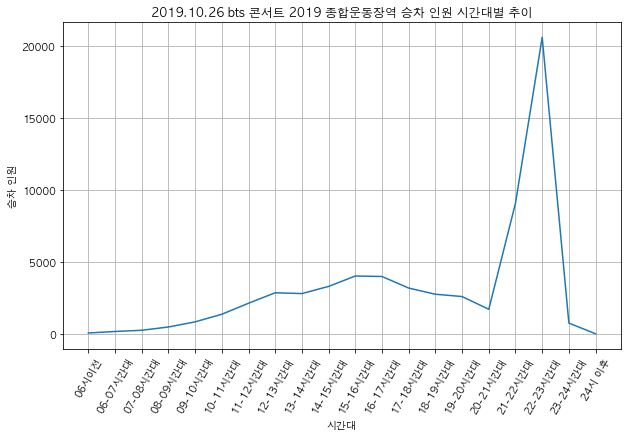

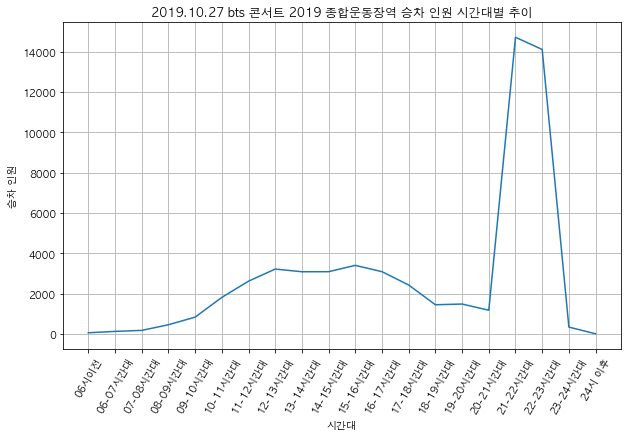

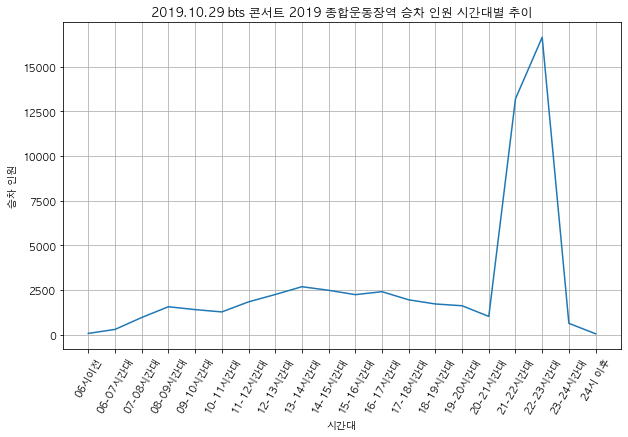

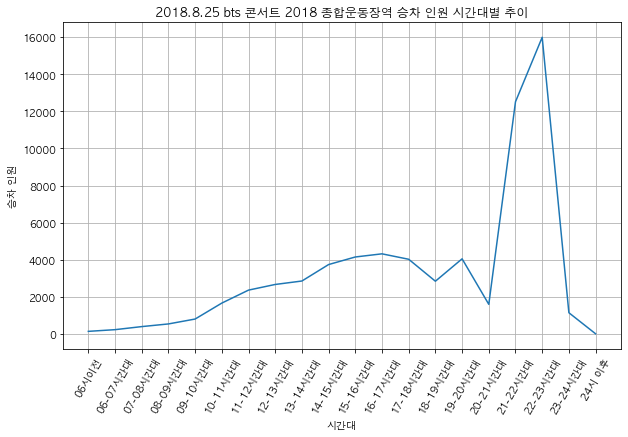

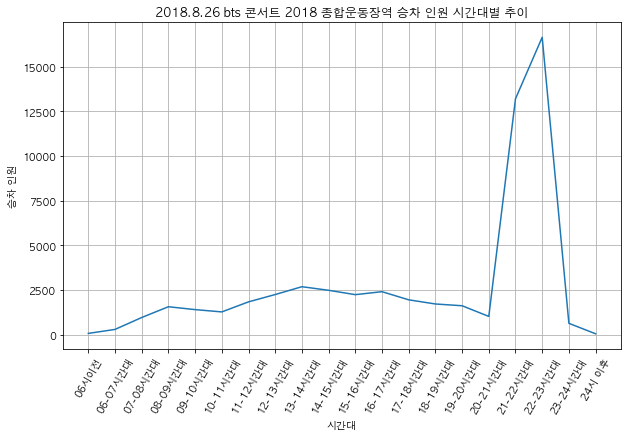

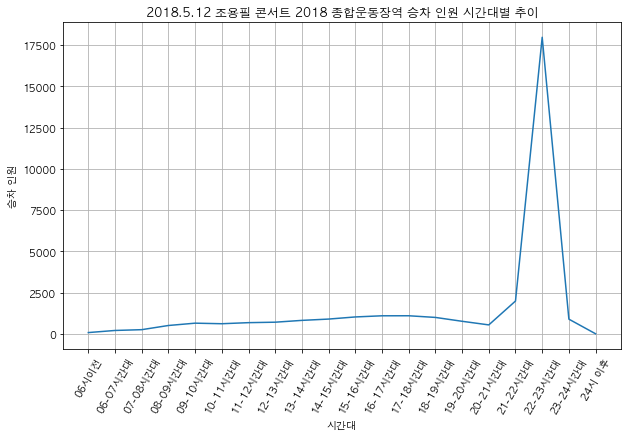

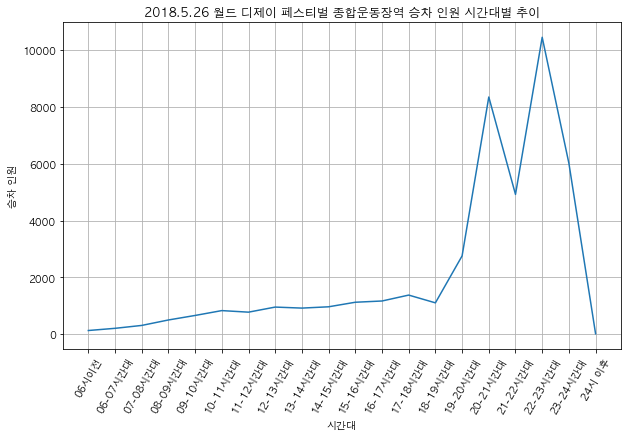

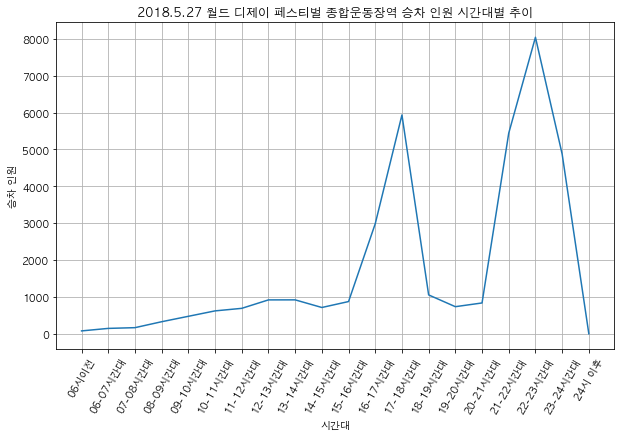

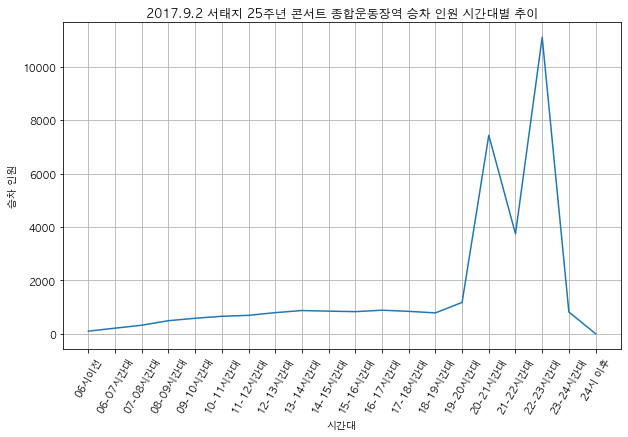

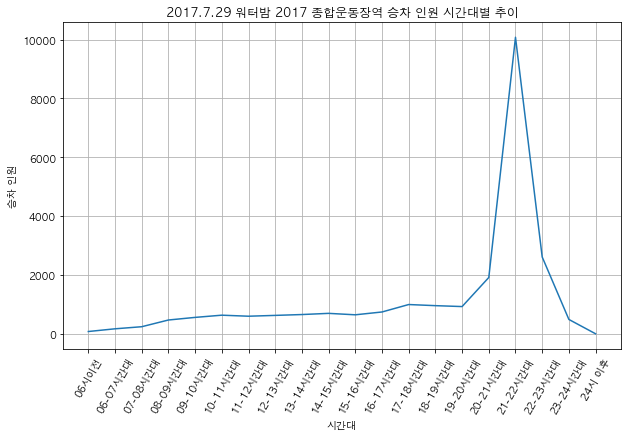

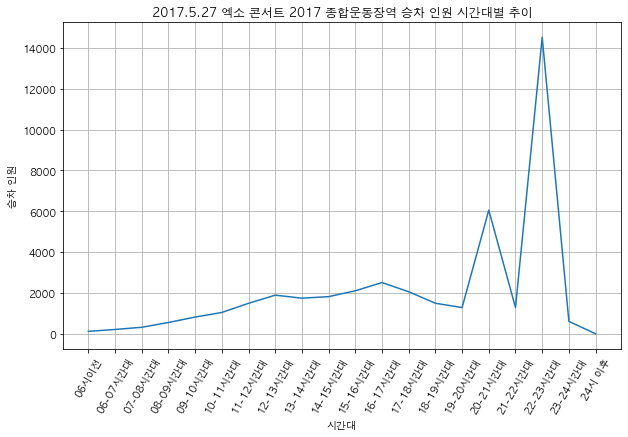

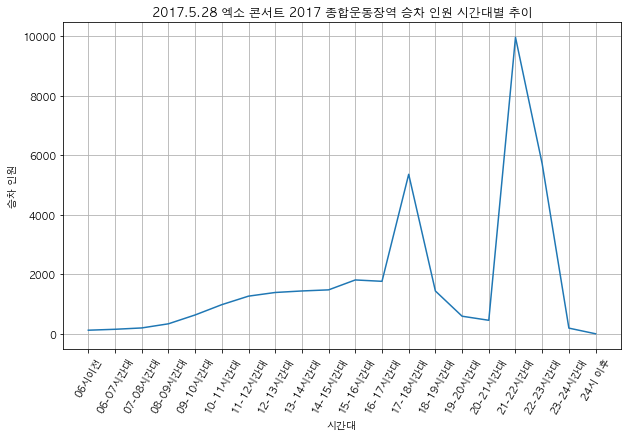

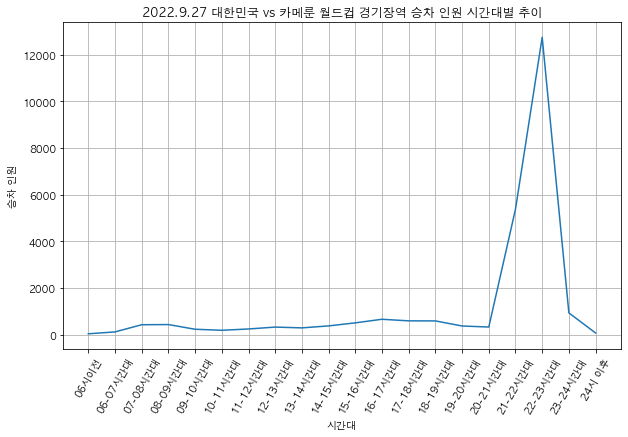

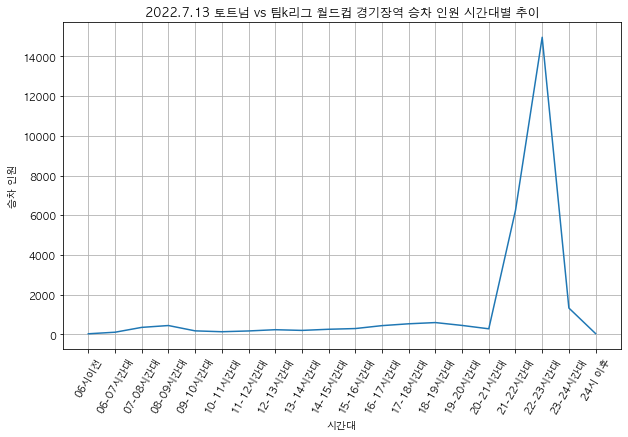

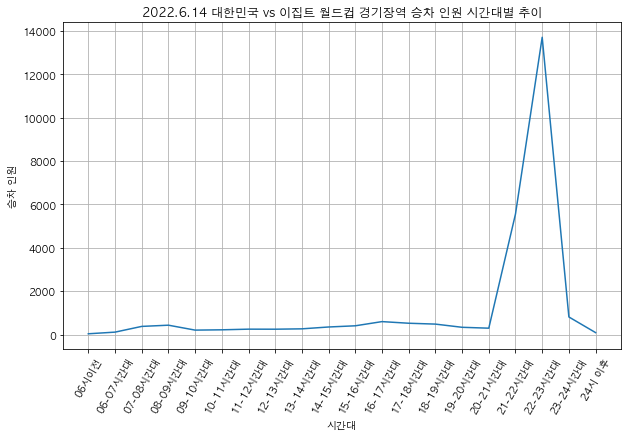

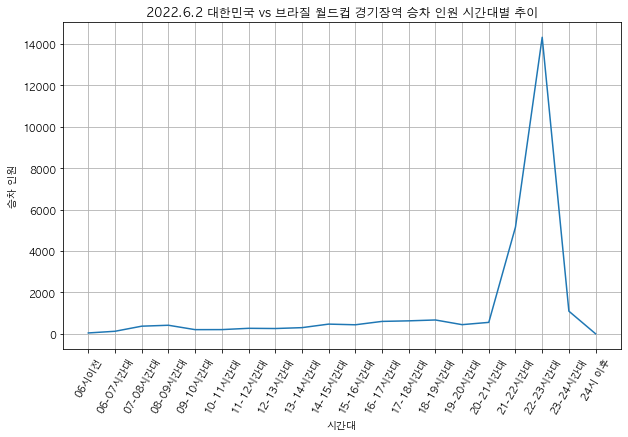

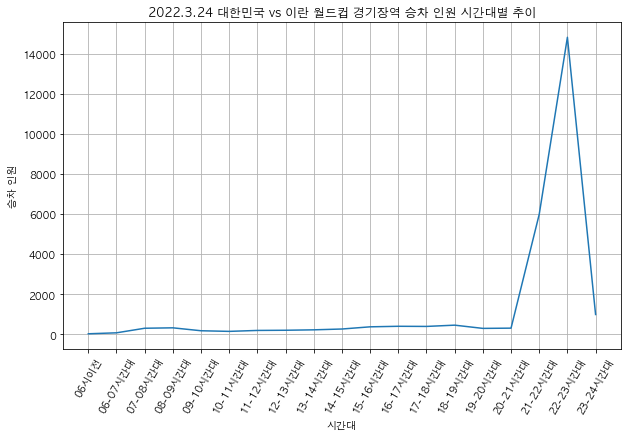

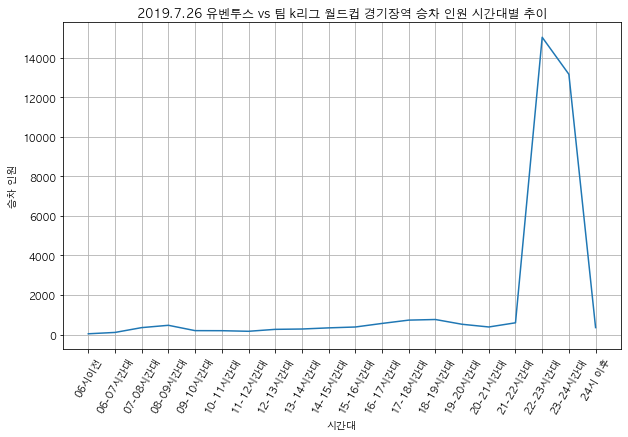

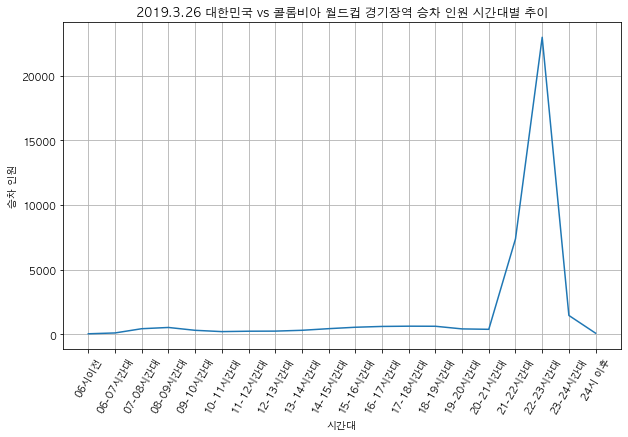

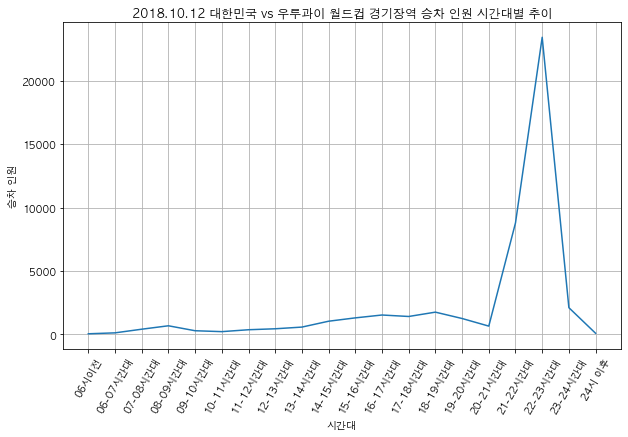

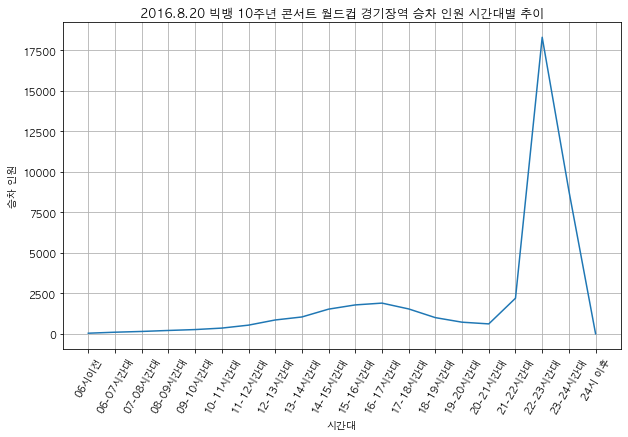

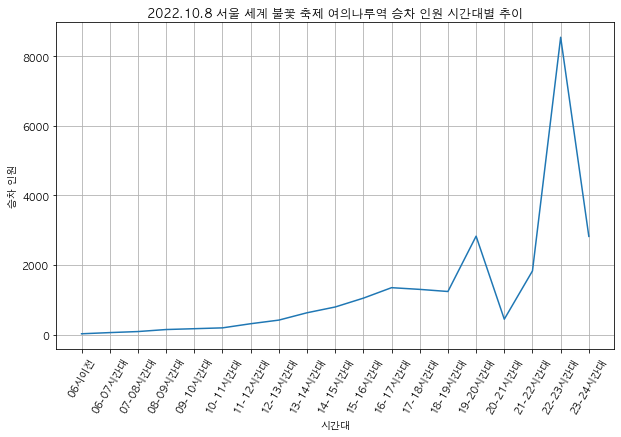

In [7]:
df = pd.DataFrame(data_ride)

# 데이터프레임에서 '06시이전'부터 '24시 이후'까지의 열 선택
time_columns = df.columns[df.columns.get_loc('06시이전'):df.columns.get_loc('24시 이후')+1]

import os

save_dir = '/Users/simgyuseong/Documents/문화데이터공모전/문화행사시 승차인원 그래프/'

# 행사별로 그래프 생성
for index, row in df.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(time_columns, row[time_columns])
    plt.xlabel('시간대')
    plt.ylabel('승차 인원')
    plt.title(f"{row['행사날짜']} {row['행사명']} {row['가까운 지하철역']} 승차 인원 시간대별 추이")
    plt.xticks(rotation = 60)
    plt.grid(True)
    save_path = os.path.join(save_dir, f"{row['행사명']}.png")
    plt.savefig(save_path)
    plt.show()


In [8]:
# 대규모 행사가 없는 날 승차인원 데이터
mean_data = pd.read_csv("/Users/simgyuseong/Documents/문화데이터공모전/평균_지하철_승하차_데이터.csv")

In [9]:
mean_data.head(5)

,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,14-15시간대,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시 이후
0,58.5,97.0,143.5,189.0,233.0,313.5,296.0,380.5,374.0,392.5,480.5,3090.5,1133.5,449.5,632.0,3709.0,2143.0,3714.5,278.5,9.0
1,40.0,82.0,78.5,163.0,217.5,350.0,389.0,464.5,385.0,381.0,431.5,793.0,6362.0,821.5,1142.0,498.0,1097.5,3705.5,215.0,8.0
2,72.0,205.0,678.0,963.5,609.0,391.5,374.0,353.5,323.0,398.5,541.5,620.5,701.5,739.0,397.5,513.0,1343.0,3327.5,214.0,32.0
3,50.0,105.5,159.5,272.5,323.0,334.5,351.0,408.0,395.0,451.0,435.0,497.0,1357.0,1248.0,464.0,412.5,936.5,3269.0,191.0,4.5
4,45.0,71.5,87.0,186.5,213.0,322.5,339.5,449.5,419.0,392.0,345.0,387.0,318.5,300.5,524.5,3766.5,524.0,201.0,50.5,5.0


In [10]:
concert_info = data_ride.iloc[0:,0:5]
concert_info = concert_info.reset_index(drop = True)

In [11]:
concert_info.head(5)

,행사명,행사날짜,시작 시간,끝나는 시간,호선
0,아이유 콘서트,2022.9.17,19:00,21:30,2호선
1,아이유 콘서트,2022.9.18,19:00,21:30,2호선
2,싸이 흠뻑쇼,2022.7.15,18:42,22:40,2호선
3,싸이 흠뻑쇼,2022.7.16,18:42,22:40,2호선
4,싸이 흠뻑쇼,2022.7.17,18:42,22:40,2호선


In [12]:
concert_info.shape

(30, 5)

In [13]:
mean_data_info = pd.concat([concert_info,mean_data],axis =1)

In [14]:
mean_data_info.shape

(30, 25)

In [15]:
mean_data_info

,행사명,행사날짜,시작 시간,끝나는 시간,호선,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시 이후
0,아이유 콘서트,2022.9.17,19:00,21:30,2호선,58.5,97.0,143.5,189.0,233.0,...,480.5,3090.5,1133.5,449.5,632.0,3709.0,2143.0,3714.5,278.5,9.0
1,아이유 콘서트,2022.9.18,19:00,21:30,2호선,40.0,82.0,78.5,163.0,217.5,...,431.5,793.0,6362.0,821.5,1142.0,498.0,1097.5,3705.5,215.0,8.0
2,싸이 흠뻑쇼,2022.7.15,18:42,22:40,2호선,72.0,205.0,678.0,963.5,609.0,...,541.5,620.5,701.5,739.0,397.5,513.0,1343.0,3327.5,214.0,32.0
3,싸이 흠뻑쇼,2022.7.16,18:42,22:40,2호선,50.0,105.5,159.5,272.5,323.0,...,435.0,497.0,1357.0,1248.0,464.0,412.5,936.5,3269.0,191.0,4.5
4,싸이 흠뻑쇼,2022.7.17,18:42,22:40,2호선,45.0,71.5,87.0,186.5,213.0,...,345.0,387.0,318.5,300.5,524.5,3766.5,524.0,201.0,50.5,5.0
5,워터밤 2022,2022.6.24,12:00,22:00,2호선,59.5,230.5,718.5,929.0,610.0,...,477.5,590.5,770.5,1027.5,484.0,421.0,1680.0,2688.5,186.0,45.5
6,워터밤 2022,2022.6.25,12:00,22:00,2호선,63.5,109.0,154.0,283.5,339.5,...,725.0,1043.0,913.5,660.0,1383.5,3567.0,5081.5,10954.5,667.0,3.0
7,워터밤 2022,2022.6.26,12:00,22:00,2호선,50.5,91.5,99.5,181.5,242.0,...,511.5,491.5,533.5,516.5,1264.5,3140.0,4985.0,5506.5,251.5,11.0
8,bts 콘서트 2019,2019.10.26,18:30,NaN,2호선,65.5,178.5,218.5,421.0,473.0,...,768.5,1263.0,1092.0,840.0,1087.0,629.5,423.0,216.0,84.5,6.0
9,bts 콘서트 2019,2019.10.27,18:30,NaN,2호선,58.5,135.5,225.5,483.0,414.0,...,865.0,662.5,722.0,520.0,670.5,363.0,333.0,175.0,70.0,0.5


(30, 25)


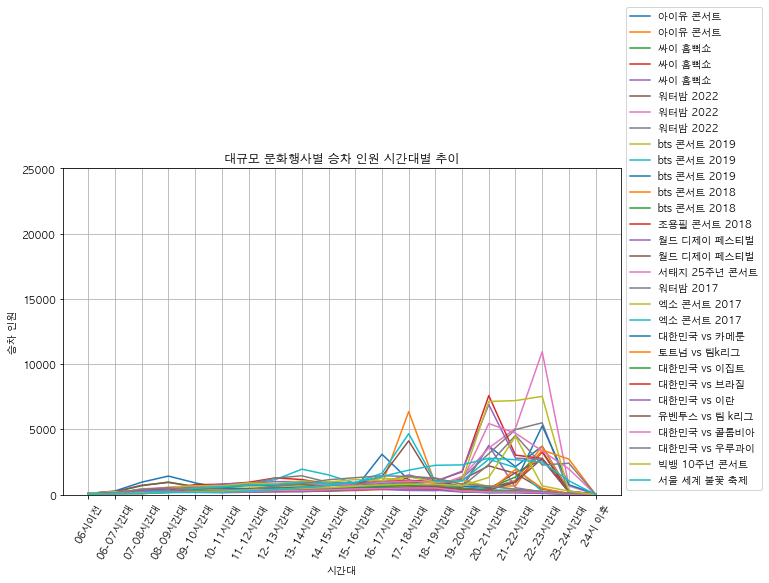

In [16]:
df = pd.DataFrame(mean_data_info)

print(df.shape)
# 데이터프레임에서 '06시이전'부터 '24시 이후'까지의 열 선택
time_columns = df.columns[df.columns.get_loc('06시이전'):df.columns.get_loc('24시 이후')+1]

# 꺾은선 그래프 생성
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(time_columns, row[time_columns], label=row['행사명'])

plt.xlabel('시간대')
plt.ylabel('승차 인원')
plt.title('대규모 문화행사별 승차 인원 시간대별 추이')
plt.ylim(0,25000)
plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.0))
plt.xticks(rotation = 60)
plt.grid(True)
plt.show()

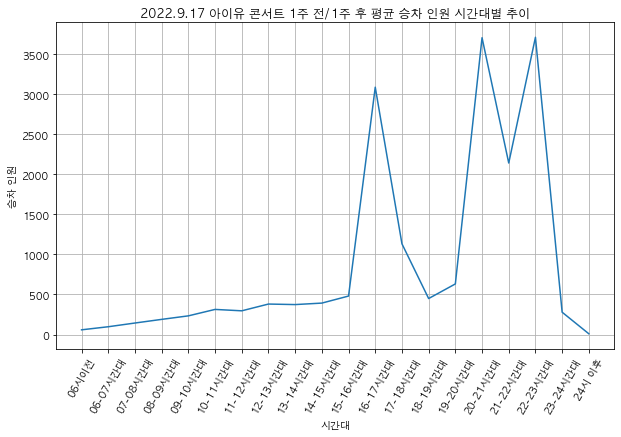

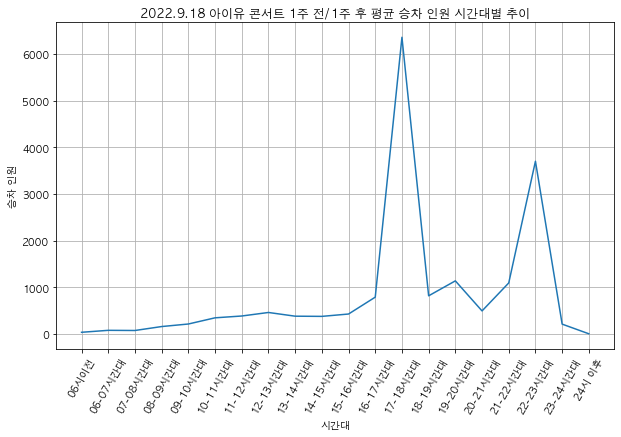

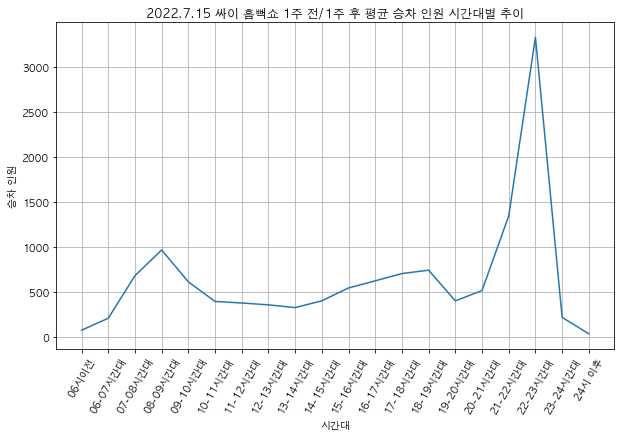

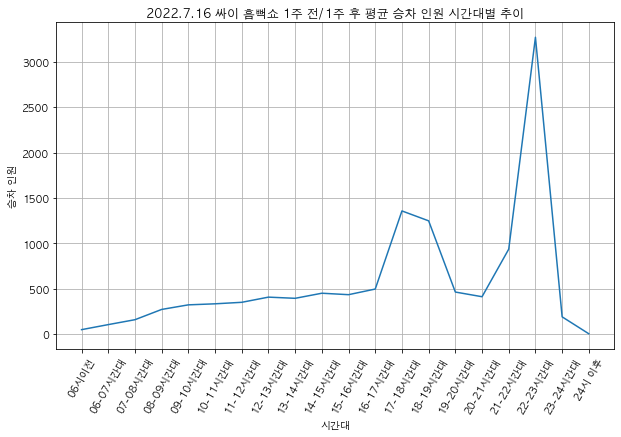

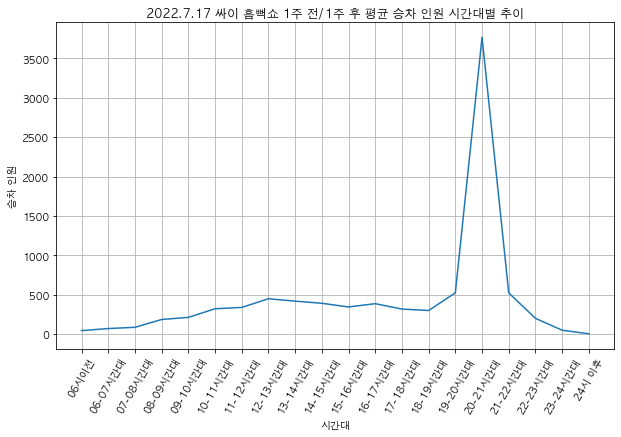

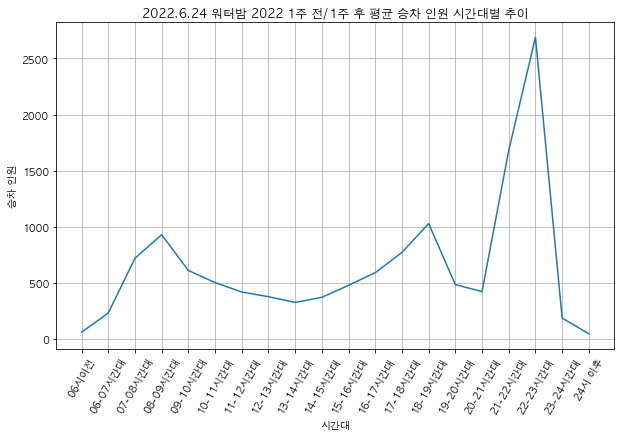

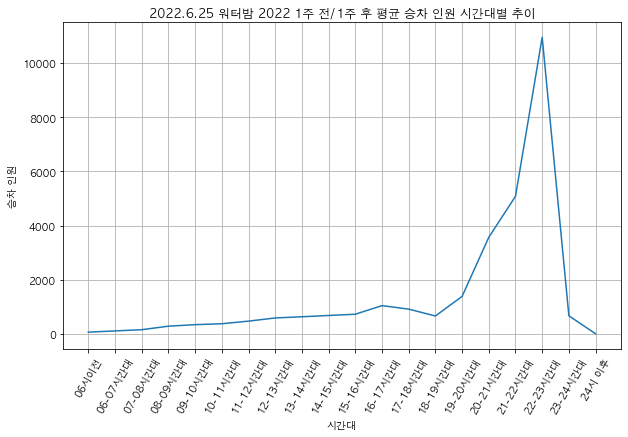

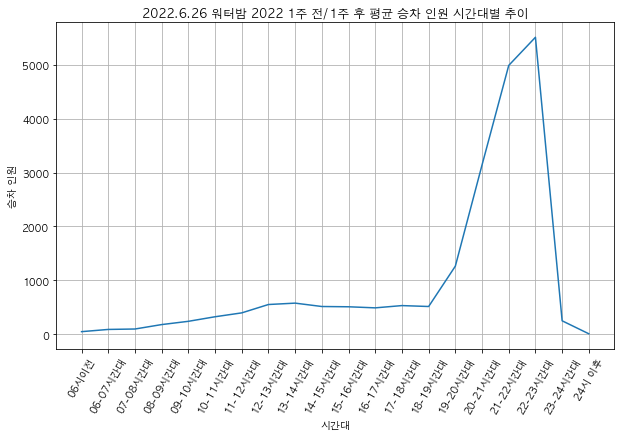

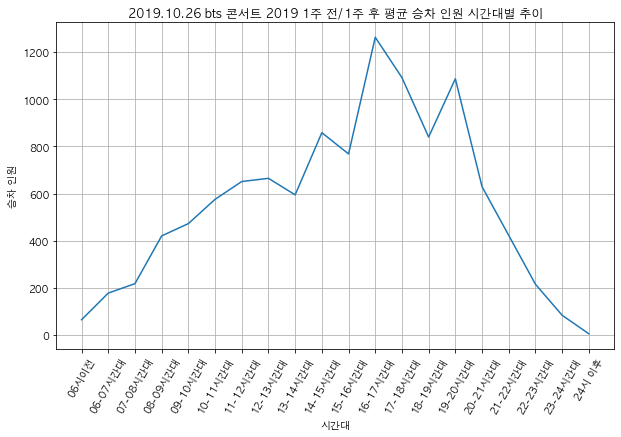

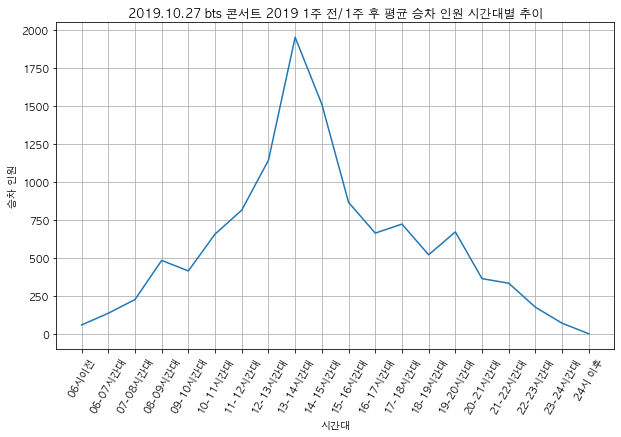

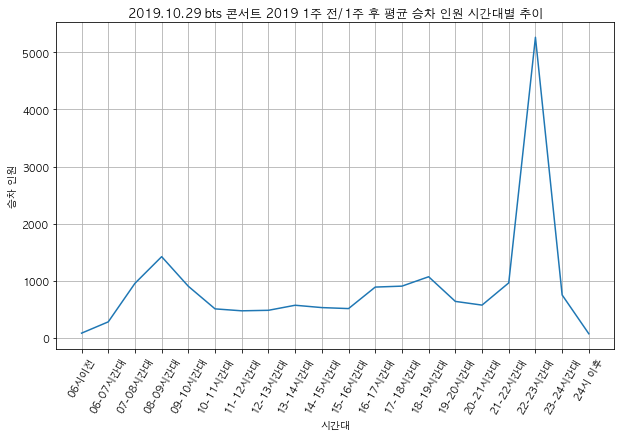

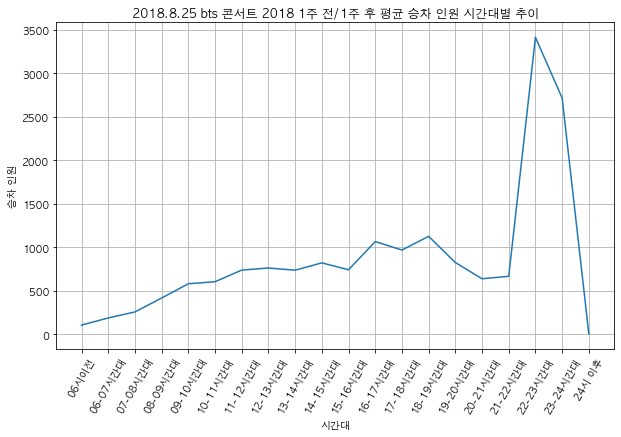

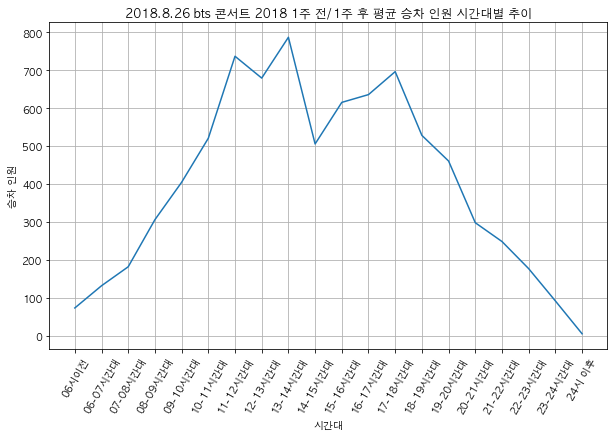

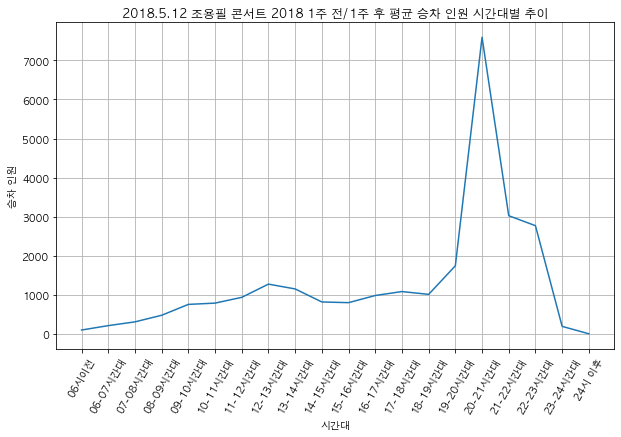

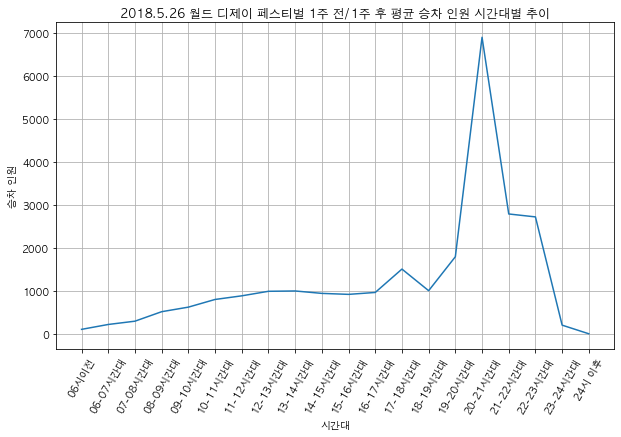

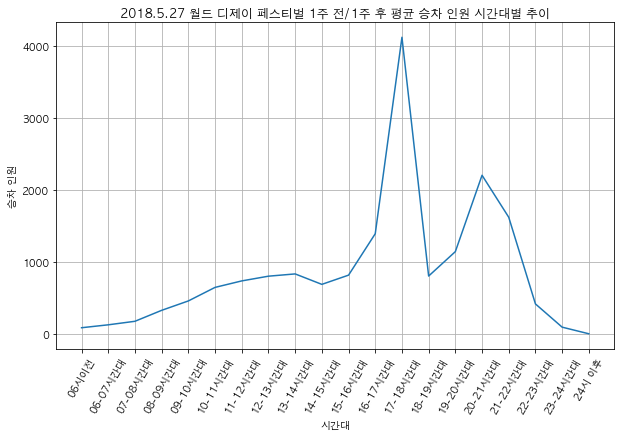

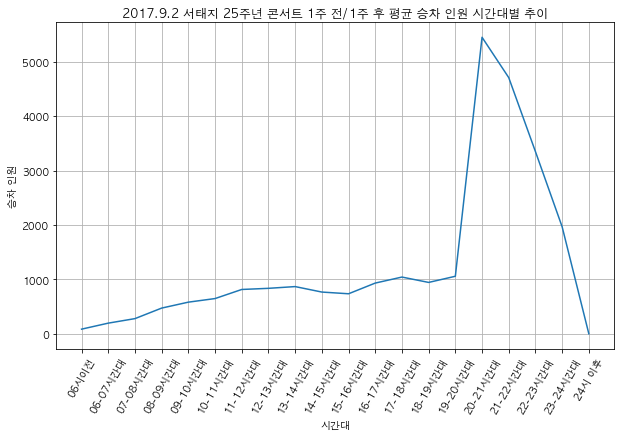

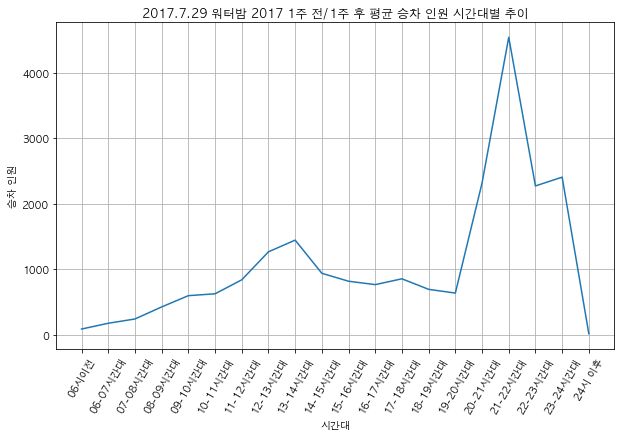

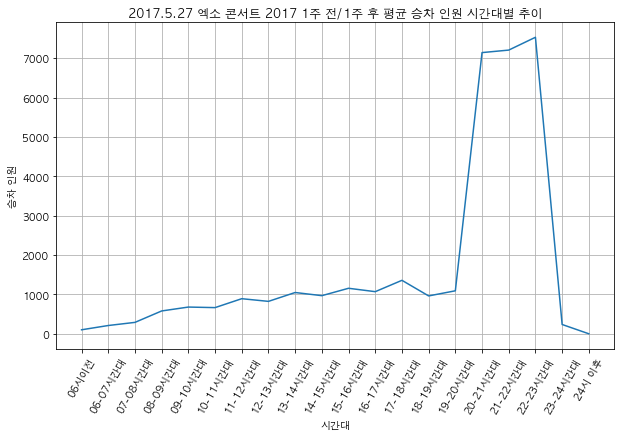

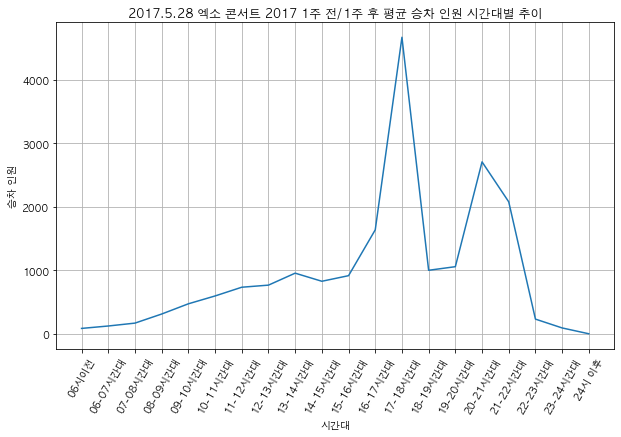

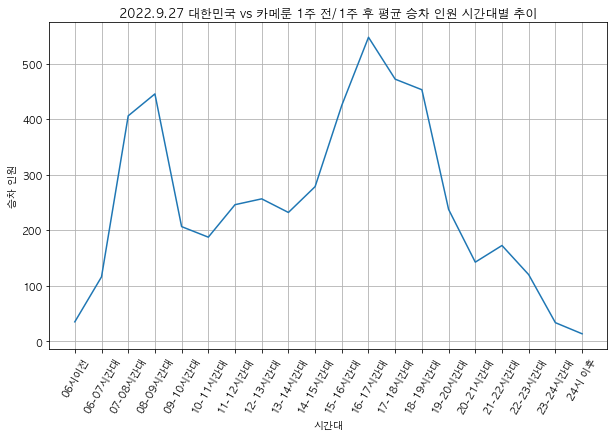

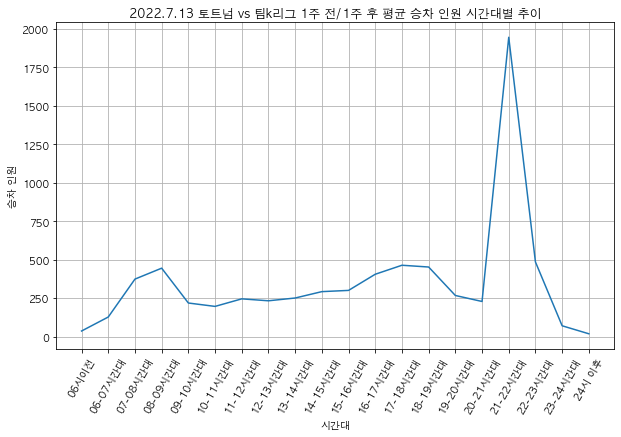

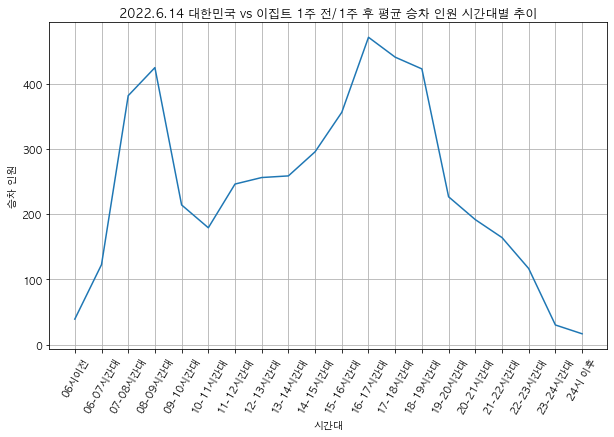

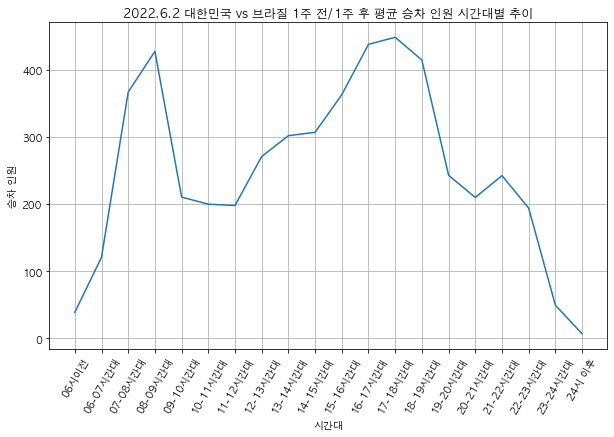

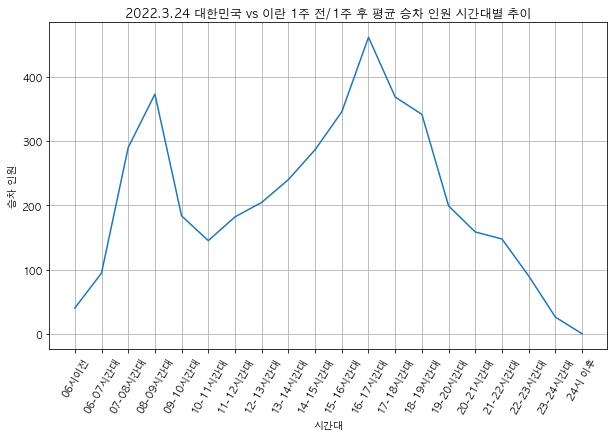

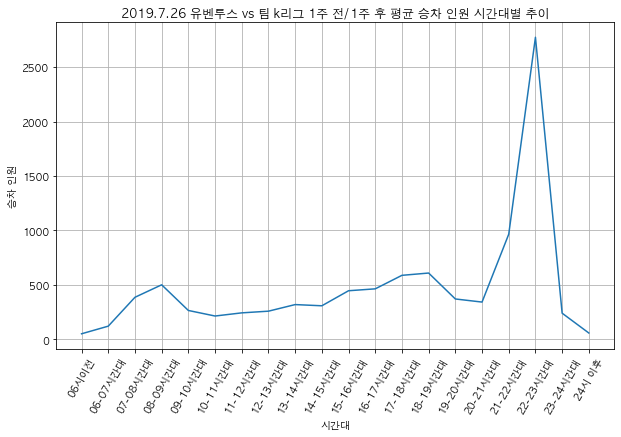

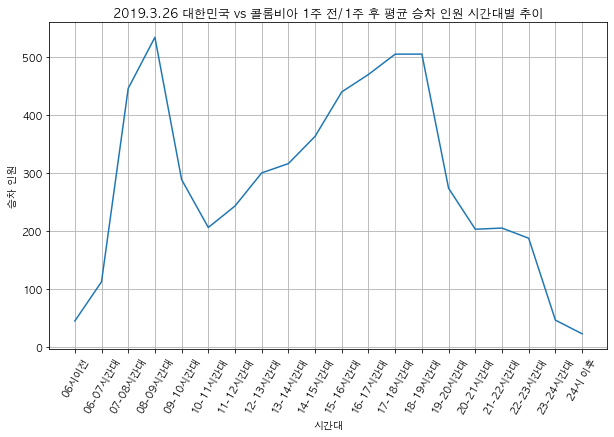

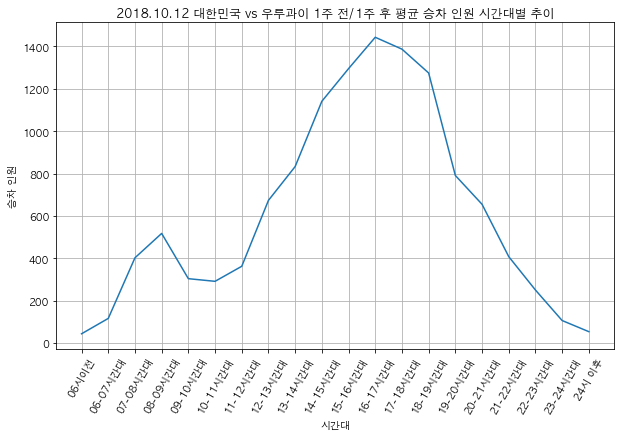

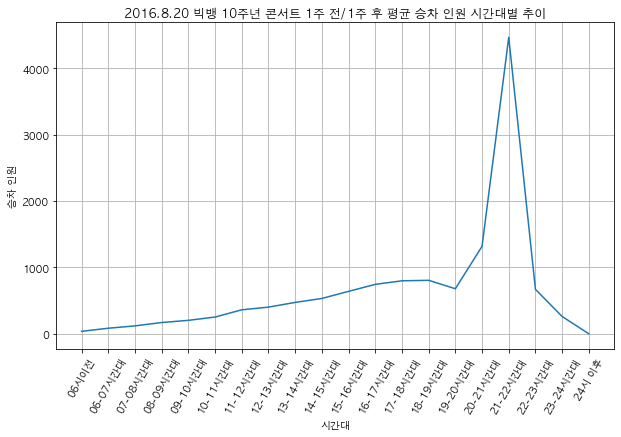

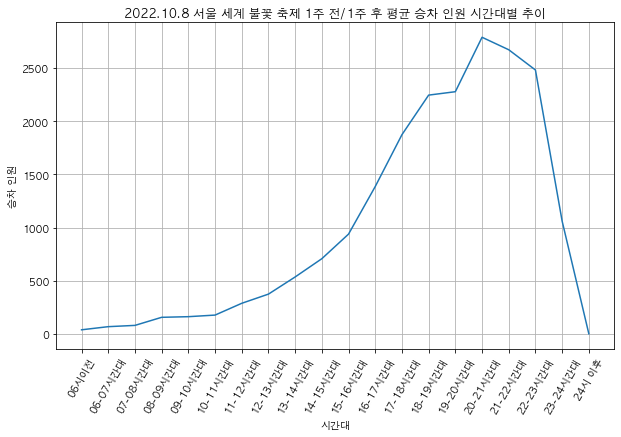

In [17]:
df = pd.DataFrame(mean_data_info)

# 데이터프레임에서 '06시이전'부터 '24시 이후'까지의 열 선택
time_columns = df.columns[df.columns.get_loc('06시이전'):df.columns.get_loc('24시 이후')+1]

import os

save_dir = '/Users/simgyuseong/Documents/문화데이터공모전/문화행사x'

# 행사별로 그래프 생성
for index, row in df.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(time_columns, row[time_columns])
    plt.xlabel('시간대')
    plt.ylabel('승차 인원')
    plt.title(f"{row['행사날짜']} {row['행사명']} 1주 전/1주 후 평균 승차 인원 시간대별 추이")
    plt.xticks(rotation = 60)
    plt.grid(True)
    save_path = os.path.join(save_dir, f"{row['행사명']}.png")
    plt.savefig(save_path)
    plt.show()


In [155]:
# 대규모 문화공연시 해당 공연 장소와 같은 노선의 환승역 교통량 파악
line_2_df = pd.read_csv('/Users/simgyuseong/Documents/문화데이터공모전/2호선환승역.csv')

In [156]:
line_2_df.rename(columns = {'역명' : '환승역'}, inplace = True)

In [157]:
grouped_data = line_2_df.groupby('환승역')

def sum_values(group):
    return group.iloc[:, 8:].sum()

# '환승역' 열 값을 기준으로 데이터프레임 그룹화
grouped_data = line_2_df.groupby('환승역')

# 그룹화된 데이터에 대해 sum_values 함수를 적용하여 값을 더함
group_sums = grouped_data.apply(sum_values)
group_sums = group_sums.iloc[:, 1:]/16

In [158]:
group_sums.insert(0, '환승역', group_sums.index)
# 환승역명 추가
group_sums.reset_index(drop=True, inplace=True)
# 행이름 제거
group_sums.shape

(21, 19)

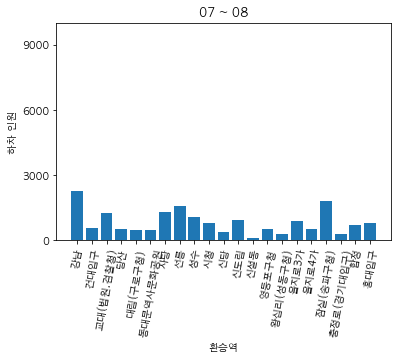

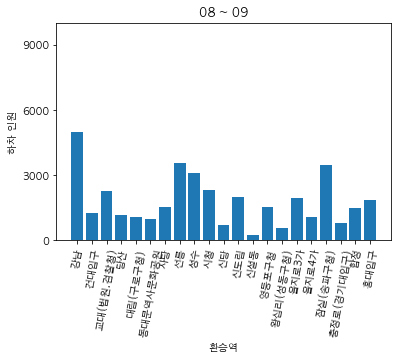

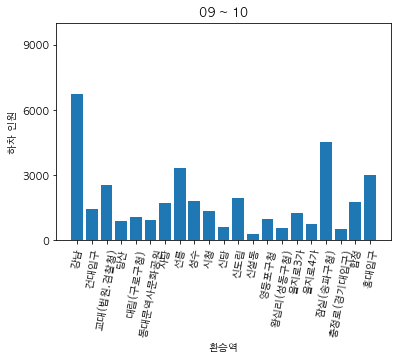

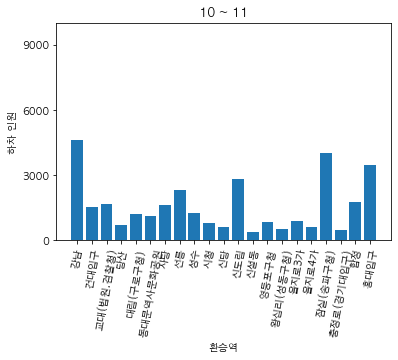

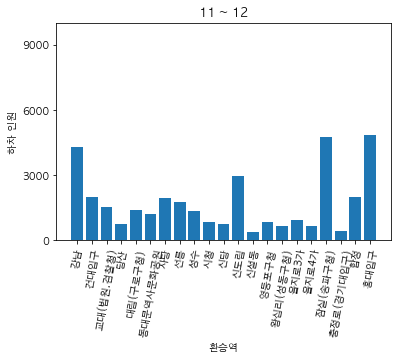

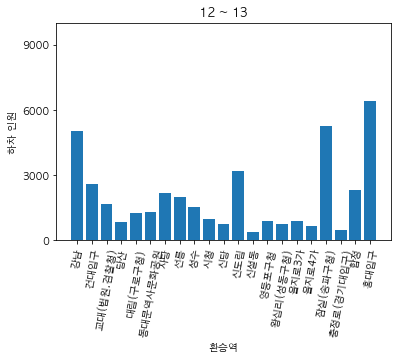

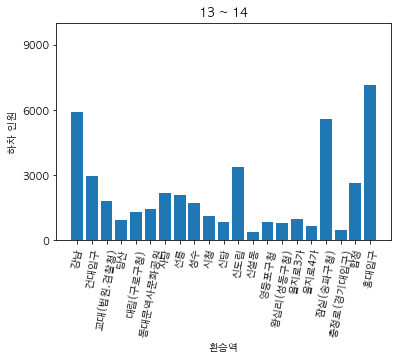

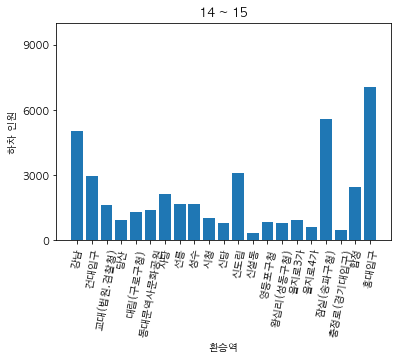

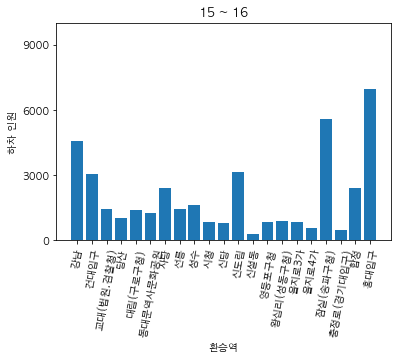

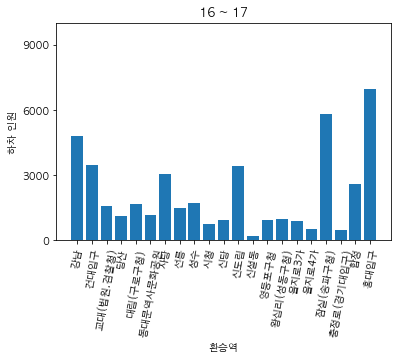

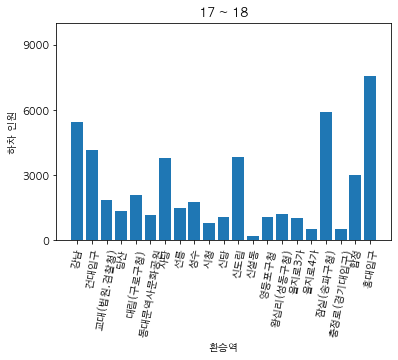

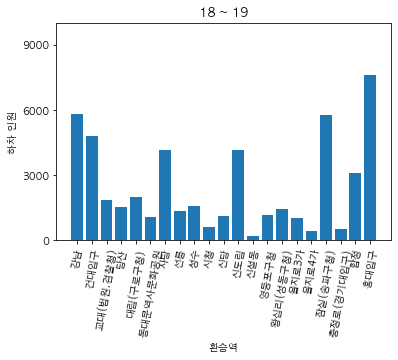

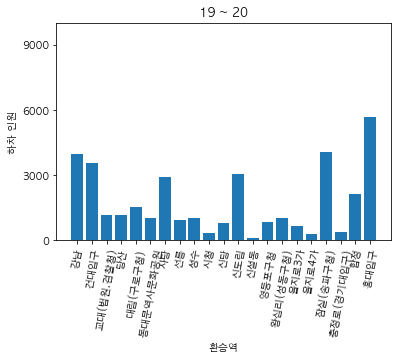

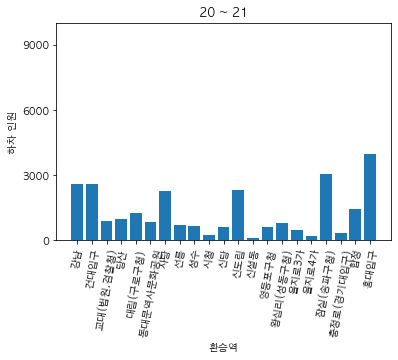

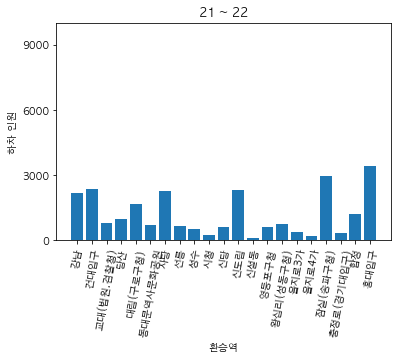

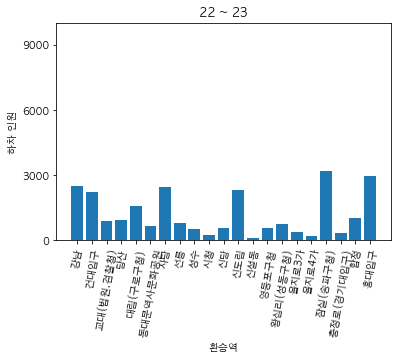

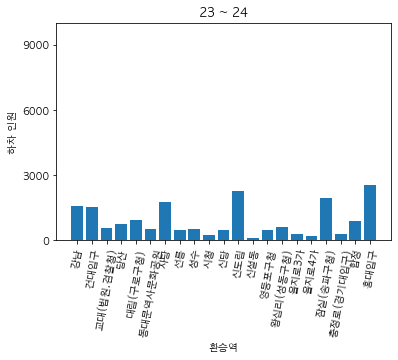

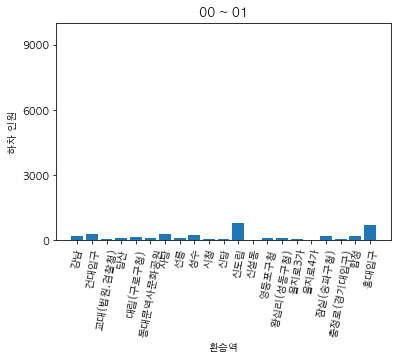

IndexError: single positional indexer is out-of-bounds

In [159]:
for i in range(1,21):
    plt.bar(group_sums['환승역'],group_sums.iloc[:,i])
    plt.xlabel('환승역')
    plt.ylabel('하차 인원') 
    plt.title(group_sums.iloc[:,i].name)
    plt.xticks(rotation = 80)
    
    plt.ylim(0, 10000)
    plt.yticks(range(0, 10001, 3000))

    plt.show()
    
# y축 눈금을 고정

In [137]:
line_2_mean = pd.read_csv("/Users/simgyuseong/Documents/문화데이터공모전/2호선환승역(+-7).csv")

In [138]:
grouped_data_x = line_2_mean.groupby('환승역')

def sum_values(group):
    return group.iloc[:, 8:].sum()

# '환승역' 열 값을 기준으로 데이터프레임 그룹화
grouped_data_x = line_2_mean.groupby('환승역')

# 그룹화된 데이터에 대해 sum_values 함수를 적용하여 값을 더함
group_sums_x = grouped_data.apply(sum_values)
group_sums_x = group_sums.iloc[:, 1:]

In [139]:
group_sums_x.insert(0, '환승역', group_sums.index)
# 환승역명 추가
group_sums_x.reset_index(drop=True, inplace=True)
# 행이름 제거

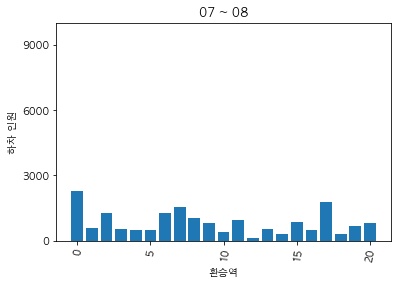

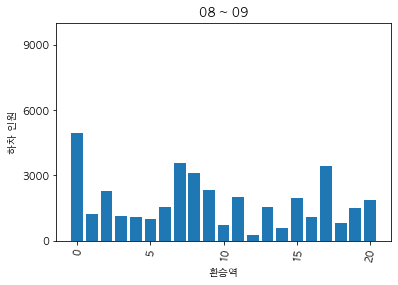

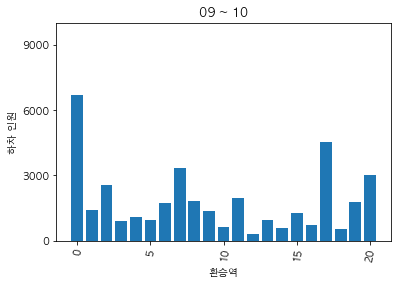

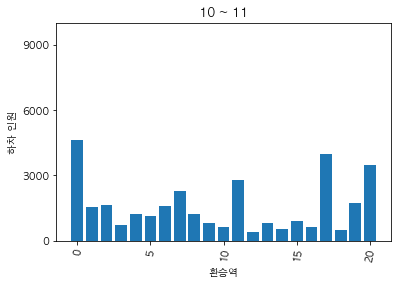

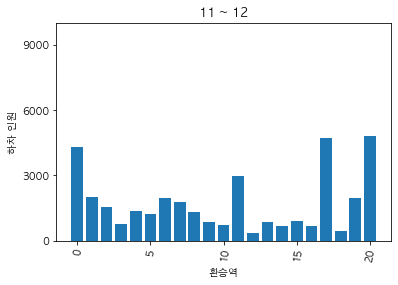

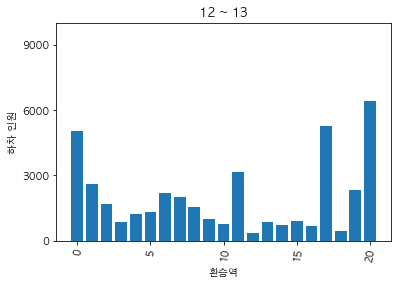

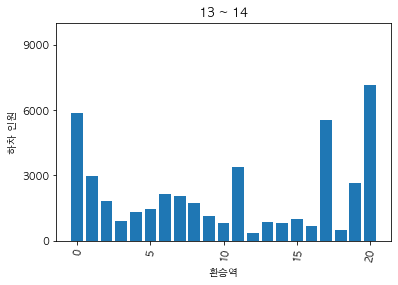

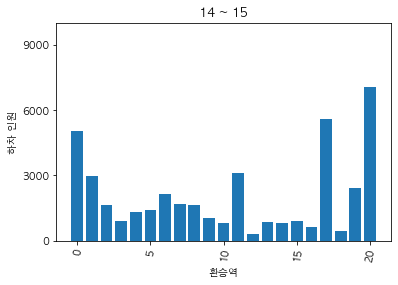

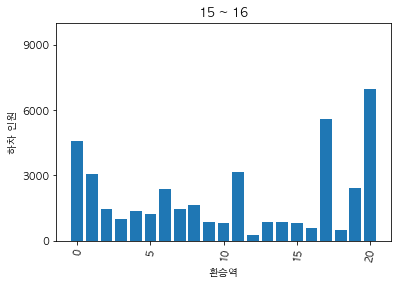

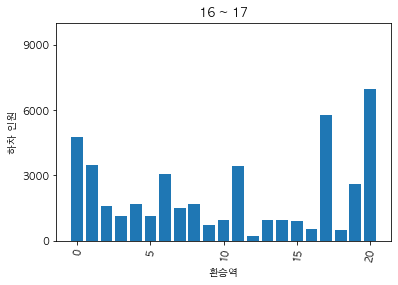

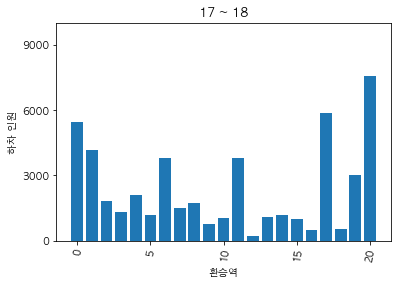

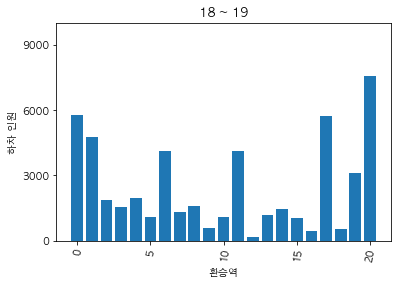

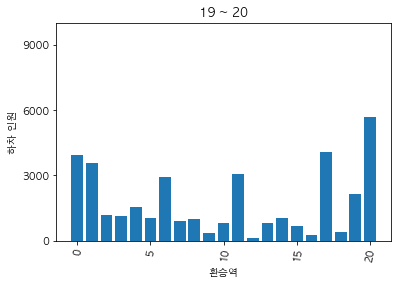

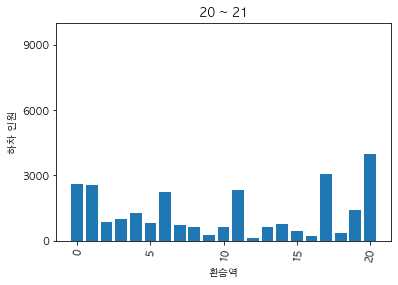

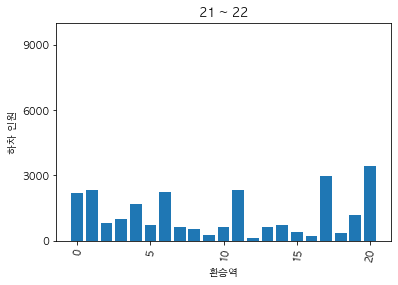

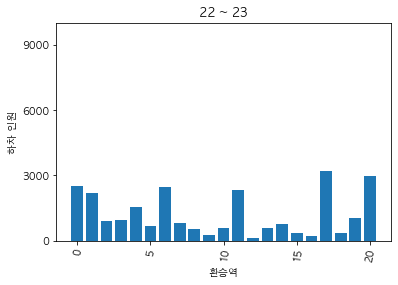

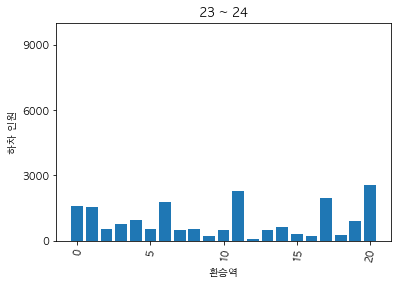

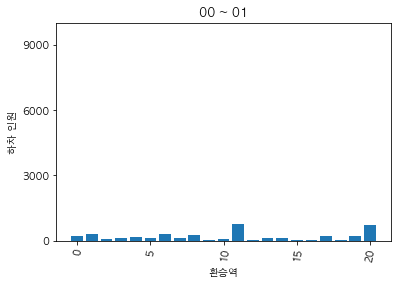

IndexError: single positional indexer is out-of-bounds

In [140]:
for i in range(1,21):
    plt.bar(group_sums_x['환승역'],group_sums_x.iloc[:,i])
    plt.xlabel('환승역')
    plt.ylabel('하차 인원') 
    plt.title(group_sums_x.iloc[:,i].name)
    plt.xticks(rotation = 80)
    
    plt.ylim(0, 10000)
    plt.yticks(range(0, 10001, 3000))
    plt.show()
    
# y축 눈금을 고정

In [199]:
# 기존 버스 노선 파악

bus_data = pd.read_csv("/Users/simgyuseong/Documents/문화데이터공모전/서울시버스노선별정류소정보(20230613).csv")

In [200]:
bus_data.head()

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,124000035,N13B,1,123000215,24305,복정역1번출구,127.127137,37.472324
1,124000036,345,1,123000661,24506,복정역환승센터4번승강장,127.127719,37.469934
2,124000038,342,1,124000344,25341,강동공영차고지,127.174627,37.564251
3,121900009,서초01,1,121900114,22567,잠원역,127.011747,37.512929
4,121900010,서초14,1,121900258,22937,이수역2번출구,126.982563,37.487212


In [201]:
bus_station_WcStadium = bus_data[bus_data["정류소명"].str.contains("월드컵경기장")]

In [202]:
bus_station_WcStadium["노선명"].unique()

array(['9711B', '710', '8777', '마포08', '7019', '마포15', '7715', '7711',
       '7016', '6011', '9711', '6715', '571', '171', '760', '673', '7733',
       '172', '271', '7730', '7011', 'N72'], dtype=object)

In [203]:
# 월드컵경기장을 지나면서 합정역도 지나는 버스 노선 탐색 

bus_routes = bus_station_WcStadium["노선명"]
routes_with_hapjeong = []

for route in bus_routes:
    route_df = bus_data[bus_data['노선명'] == route]
    has_hapjeong = any(route_df['정류소명'].str.contains('합정'))
    
    if has_hapjeong:
        routes_with_hapjeong.append(route)

print(f"'합정'이라는 단어를 포함하는 정류소명을 지나는 노선들: {routes_with_hapjeong}")


'합정'이라는 단어를 포함하는 정류소명을 지나는 노선들: ['7733', '271', '7011', 'N72']


In [204]:
# 기존 버스 노선 파악
bus_data = pd.read_csv("/Users/simgyuseong/Documents/문화데이터공모전/서울시버스노선별정류소정보(20230613).csv")

bus_station_jst = bus_data[bus_data["정류소명"].str.contains("잠실종합운동장")]

print(bus_station_jst["노선명"].unique())


['6006-1' '6006' '2415' 'N13B' '360' '350' '352' '3414' '345' '6000' '301'
 '3417' '341' '3217' '3322' '4319' 'N31' '3314' '3422' '3411' '351' '333'
 '342' '3412' 'N13']


In [205]:
# 종합운동장을 지나면서 강남역도 지나는 버스 노선 탐색 

bus_routes = bus_station_jst["노선명"]
routes_with_gangnam = []

for route in bus_routes:
    route_df = bus_data[bus_data['노선명'] == route]
    has_gangnam = any(route_df['정류소명'].str.contains('강남역'))
    
    if has_gangnam:
        routes_with_gangnam.append(route)
        
    routes_with_gangnam_set = set(routes_with_gangnam)
    routes_with_gangnam = list(routes_with_gangnam_set)

print(f"'강남'이라는 단어를 포함하는 정류소명을 지나는 노선들: {routes_with_gangnam}")

'강남'이라는 단어를 포함하는 정류소명을 지나는 노선들: ['6000', '341', 'N13B', 'N13', 'N31', '360', '3412']


In [208]:
# 종합운동장을 지나면서 홍대입구역도 지나는 버스 노선 탐색 

bus_routes = bus_station_jst["노선명"]
routes_with_hongdae = []

for route in bus_routes:
    route_df = bus_data[bus_data['노선명'] == route]
    has_hongdae = any(route_df['정류소명'].str.contains('홍대입구'))
    
    if has_hongdae:
        routes_with_hongdae.append(route)
        
    routes_with_hongdae_set = set(routes_with_hongdae)
    routes_with_hongdae = list(routes_with_hongdae_set)

print(f"'홍대입구역'이라는 단어를 포함하는 정류소명을 지나는 노선들: {routes_with_hongdae}")

'홍대입구역'이라는 단어를 포함하는 정류소명을 지나는 노선들: []


In [209]:
# 종합운동장을 지나면서 잠실도 지나는 버스 노선 탐색 

bus_routes = bus_station_jst["노선명"]
routes_with_jamsil = []

for route in bus_routes:
    route_df = bus_data[bus_data['노선명'] == route]
    has_jamsil = any(route_df['정류소명'].str.contains('잠실역'))
    
    if has_jamsil:
        routes_with_jamsil.append(route)
        
    routes_with_jamsil_set = set(routes_with_jamsil)
    routes_with_jamsil = list(routes_with_jamsil_set)

print(f"'잠실역'이라는 단어를 포함하는 정류소명을 지나는 노선들: {routes_with_jamsil}")

'잠실역'이라는 단어를 포함하는 정류소명을 지나는 노선들: ['345', '341', '6000', '3314', '342', 'N31', '351', '352', '360', '3412', '3414', '6006-1', '4319', '6006', '2415', 'N13B', 'N13', '301', '3217', '3411']


In [195]:
from sys import executable                                                        
print(executable)
!/Users/simgyuseong/opt/anaconda3/bin/python -m pip install folium

/Users/simgyuseong/opt/anaconda3/bin/python
